In [94]:
import json
import pathlib
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import polars as pl

import srcdir

TRAIN_IMAGE_DIR = pathlib.Path('../data/train_segmentation_images')
TEST_IMAGE_DIR = pathlib.Path('../data/evaluation_segmentation_images')
TRAIN_ANNOTATIONS = pathlib.Path('../data/train_segmentation_annotations.json')

In [95]:
with open(TRAIN_ANNOTATIONS, 'r') as f:
    annotations = json.load(f)['images']
    
annotations

[{'file_name': 'cropped_train_0.tif',
  'width': 35,
  'height': 45,
  'annotations': [{'class': 'vacant_lot',
    'segmentation': [11.552999999999997,
     0.24600000000000222,
     6.0,
     17.0,
     6.0,
     20.0,
     5.0,
     23.0,
     3.0,
     23.0,
     0.0,
     39.0,
     21.58499999999998,
     45.391999999999996,
     33.0,
     15.0,
     35.0,
     11.0,
     34.0,
     6.0,
     34.0,
     3.0]}]},
 {'file_name': 'cropped_train_1.tif',
  'width': 203,
  'height': 144,
  'annotations': [{'class': 'vacant_lot',
    'segmentation': [16.0,
     10.0,
     0.0,
     87.0,
     13.0,
     93.0,
     15.0,
     96.0,
     18.0,
     104.0,
     24.0,
     106.0,
     31.0,
     129.0,
     29.0,
     140.0,
     61.0,
     144.0,
     103.0,
     139.0,
     128.0,
     132.0,
     147.0,
     122.0,
     152.0,
     124.0,
     171.0,
     104.0,
     170.0,
     98.0,
     184.0,
     81.0,
     189.0,
     82.0,
     202.0,
     65.0,
     203.0,
     59.0,
     203.0,


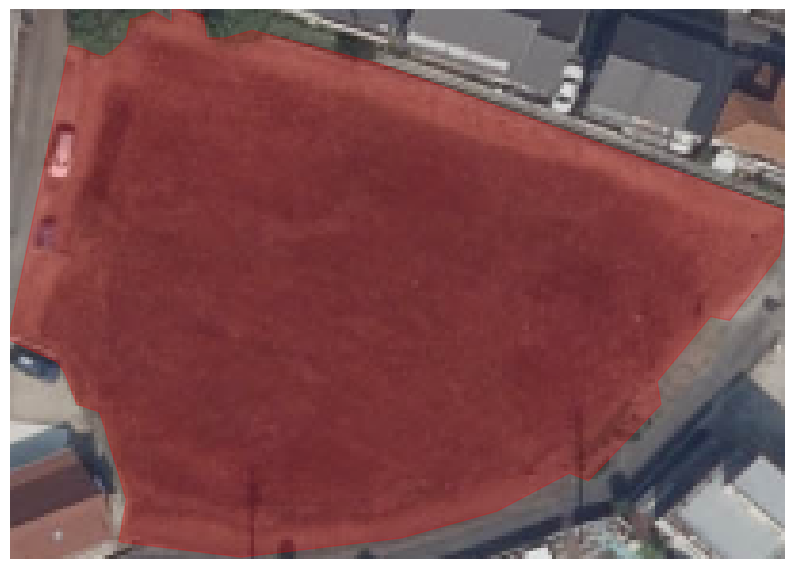

In [96]:
def show_polygon(imgfile: pathlib.Path, polygon: tuple[int] | list[tuple[int]]) -> None:
    img = plt.imread(imgfile)
    mask = np.zeros_like(img, dtype=np.uint8)
    points = np.array(polygon, dtype=np.int64) - 1
    points = points.reshape(-1, 2)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.gca().add_patch(
        plt.Polygon(points, closed=True, fill=True, color='red', alpha=0.25)
    )
    plt.axis('off')  

no = 2
imgfile = TRAIN_IMAGE_DIR / annotations[1]['file_name']
polygon = annotations[1]['annotations'][0]['segmentation']

show_polygon(imgfile, polygon)

../data/evaluation_segmentation_images/cropped_evaluation_0.tif
(width, height) = (47, 44)


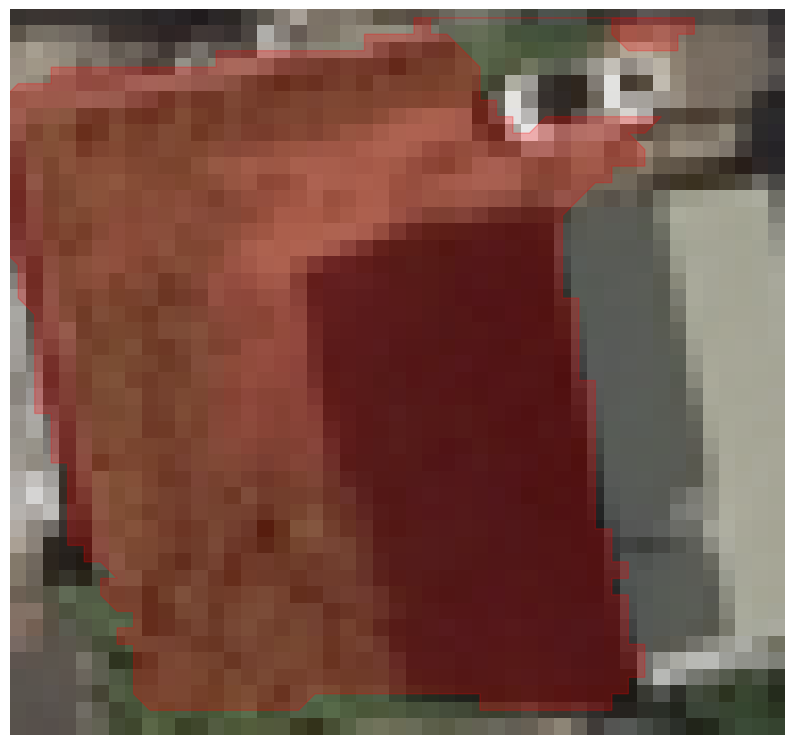

In [133]:
with open('../outputs/submissions/kmmr/segmentation.json', 'r') as f:
    test_annotations = json.load(f)['images']

no = 0
imgfile = TEST_IMAGE_DIR / test_annotations[no]['file_name']
w, h = test_annotations[no]['width'], test_annotations[no]['height']
test_segmentation = test_annotations[no]['annotations'][0]['segmentation']

print(imgfile)
print(f'(width, height) = ({w}, {h})')

w_scale = w / 256.
h_scale = h / 256.

test_polygon = np.array(test_segmentation, dtype=np.int64).reshape(-1, 2)
test_polygon = test_polygon * (w_scale, h_scale)

show_polygon(imgfile, test_polygon)

In [134]:
from copy import deepcopy

fixed_annotations = deepcopy(test_annotations)
for i in range(len(test_annotations)):
    w, h = test_annotations[i]['width'], test_annotations[i]['height']
    w_scale = w / 256.
    h_scale = h / 256.
    
    polygon = np.array(test_annotations[i]['annotations'][0]['segmentation']).reshape(-1, 2)
    polygon = polygon * (w_scale, h_scale)
    polygon = polygon.astype(np.int64)
    _, idx = np.unique(polygon, axis=0, return_index=True)
    polygon = polygon[np.sort(idx)]
    segmentation = polygon.flatten().tolist()
    
    fixed_annotations[i]['annotations'][0]['segmentation'] = segmentation

In [ ]:
with open('../outputs/submissions/kmmr/fixed_segmentation.json', 'w') as f:
    json.dump({'images': fixed_annotations}, f, indent=2)


../data/evaluation_segmentation_images/cropped_evaluation_1088.tif
(width, height) = (37, 33)


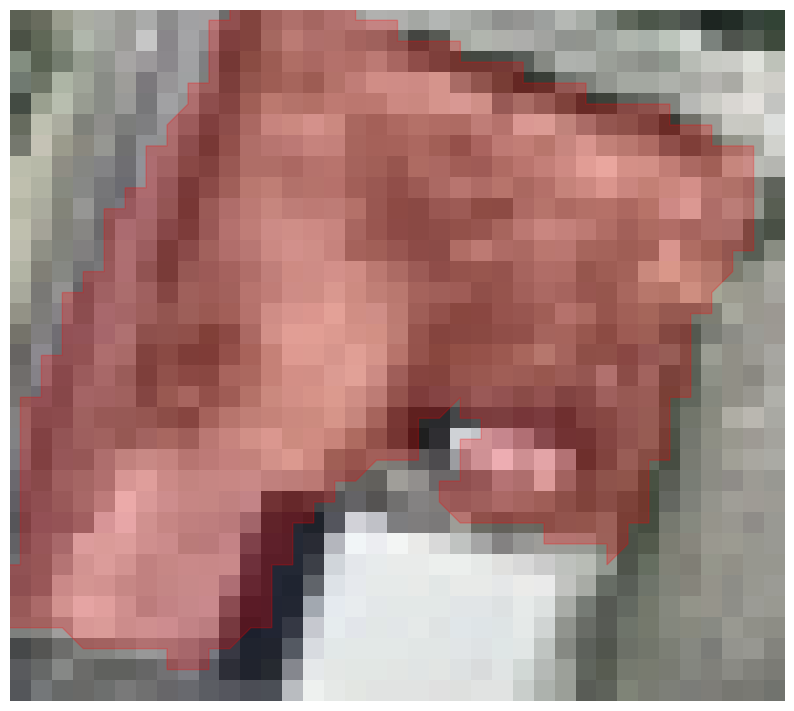

In [142]:
with open('../outputs/submissions/kmmr/fixed_segmentation.json', 'r') as f:
    test_annotations = json.load(f)['images']


no = 100
imgfile = TEST_IMAGE_DIR / test_annotations[no]['file_name']
w, h = test_annotations[no]['width'], test_annotations[no]['height']
test_segmentation = test_annotations[no]['annotations'][0]['segmentation']

print(imgfile)
print(f'(width, height) = ({w}, {h})')


test_polygon = np.array(test_segmentation, dtype=np.int64).reshape(-1, 2)

show_polygon(imgfile, test_polygon)